In [83]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
74.8       1
73.2       1
87.1       1
65         1
56.7       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [80]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [6]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [7]:
pr["poverty_rate"]= pr["poverty_rate"].astype("float")

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [8]:
pr

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [9]:
pr["poverty_rate"]

0        78.8
1        29.1
2        25.5
3        30.7
4        42.0
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328     0.0
Name: poverty_rate, Length: 29329, dtype: float64

In [77]:
pr.groupby("Geographic Area").mean().info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poverty_rate  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes


In [71]:
ps1= pr.groupby("Geographic Area").mean()


In [86]:
ps1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poverty_rate  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes


Text(0.5, 0, 'States')

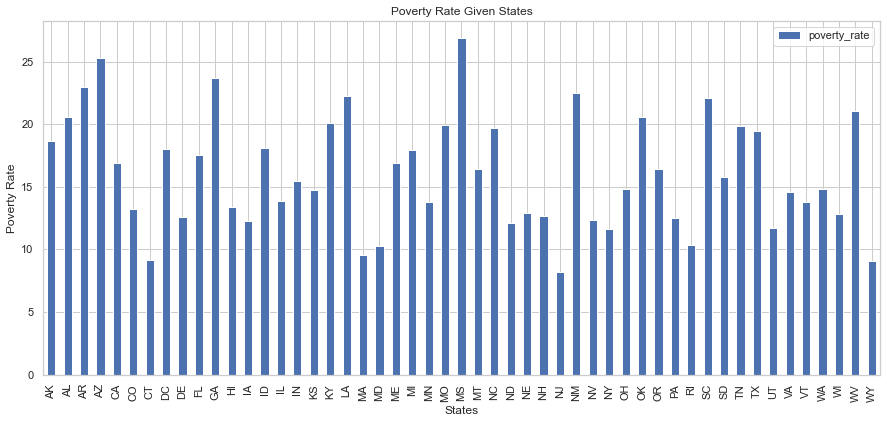

In [178]:
f, ax = plt.subplots(figsize=(15, 6.5))
ax=ps1.plot.bar( title="Poverty Given Rates",ax=ax)

ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')




**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [61]:
ps1= pr.groupby("Geographic Area").mean()
ps=ps1.sort_values(by="poverty_rate",ascending=False)

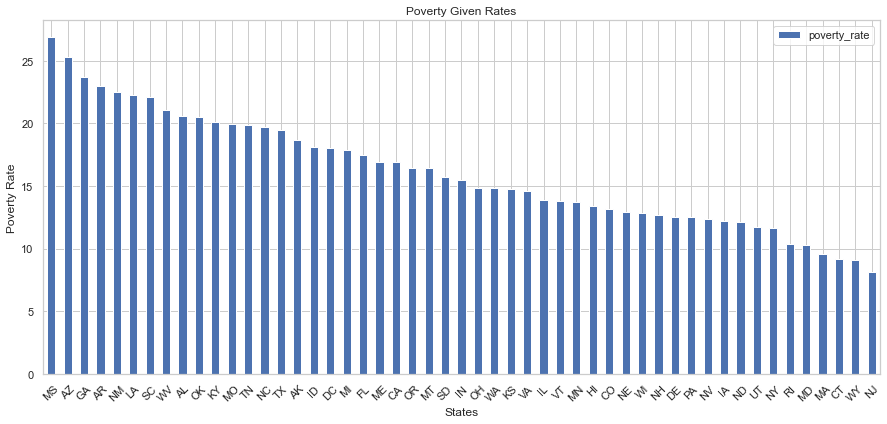

In [179]:
f, ax = plt.subplots(figsize=(15, 6.5))
ps.plot.bar( title="Poverty Given Rates",ax=ax)
ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')
ax.set_xticklabels(ps.index, rotation=45)
plt.show()

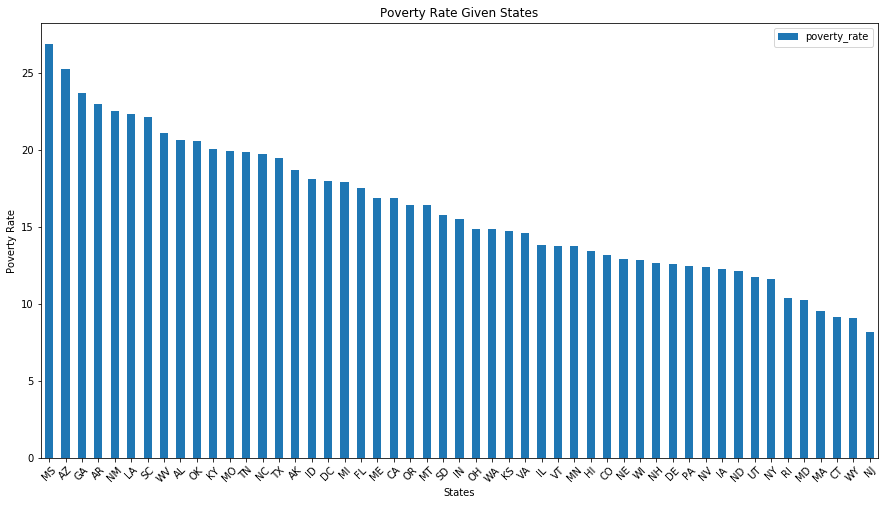

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

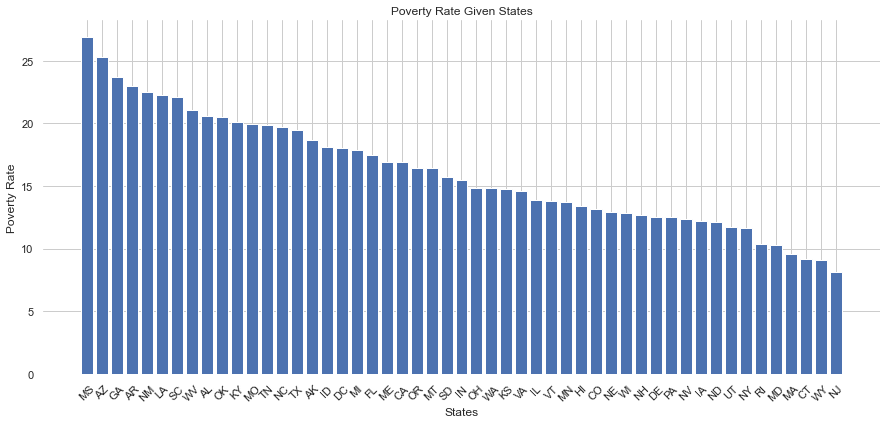

In [180]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
ax.set_title("Poverty Rate Given States")
ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')
ax.set_xticklabels(ps.index, rotation=45)

ax=plt.bar(ps.index,height=ps.poverty_rate, data=ps)


Text(0.5, 1.0, 'Poverty Rate Given States')

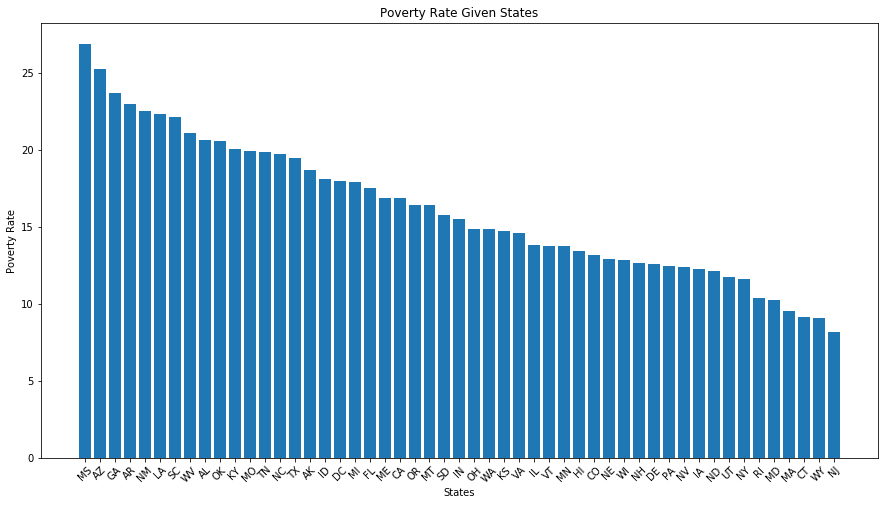

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

Text(0.5, 0, 'States')

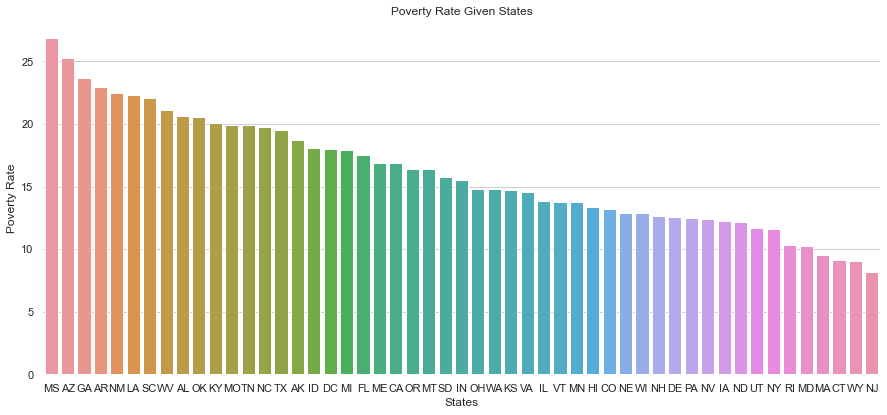

In [53]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)

sns.barplot(ps.index,ps.poverty_rate) 
ax.set_title("Poverty Rate Given States")
ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')

## 2. Most common 15 Name or Surname of killed people 

In [15]:
kill.name.value_counts().head(15)

TK TK                       49
Michael Brown                2
TK Tk                        2
Brandon Jones                2
Michael Johnson              2
Daquan Antonio Westbrook     2
Eric Harris                  2
Daniel Jonathan Shaham       1
Roy Minton                   1
Jeffrey Clair Cave           1
Jamie Dougan                 1
Kavonda Earl Payton          1
Amy Jean McCoy               1
Joshua Tate Fielding         1
Kenneth Arnold Buck          1
Name: name, dtype: int64

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [16]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [119]:
pairs = kill.name[kill.name != 'TK TK'].str.split()
langlist =[]
for i in pairs:
    langlist.extend(i)
pl=pd.Series(langlist).value_counts().head(15)
pl

Michael        91
David          57
James          57
Joseph         48
Robert         48
William        47
Daniel         46
John           42
Christopher    40
Lee            38
Richard        36
Smith          36
Anthony        32
J.             32
Johnson        32
dtype: int64

In [44]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [120]:
pl.index

Index(['Michael', 'David', 'James', 'Joseph', 'Robert', 'William', 'Daniel',
       'John', 'Christopher', 'Lee', 'Richard', 'Smith', 'Anthony', 'J.',
       'Johnson'],
      dtype='object')

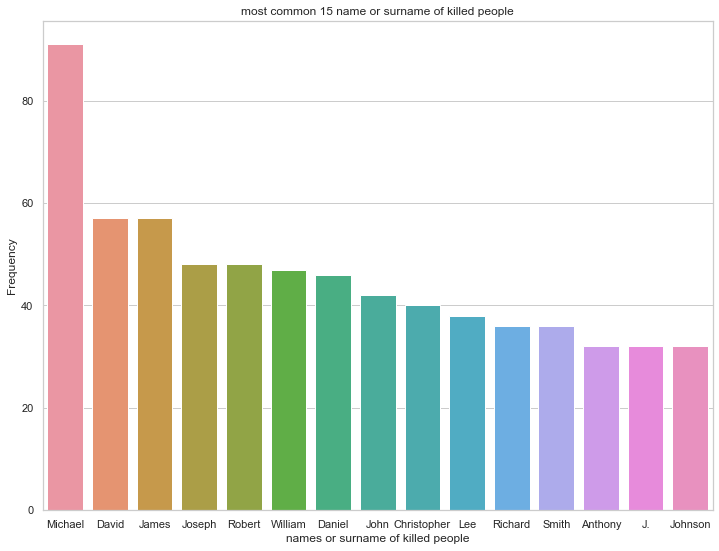

In [166]:
fig, ax = plt.subplots(figsize=(12,9))

ax=sns.barplot(x=pl.index, y= pl.values, ax=ax)

ax.set_ylabel('Frequency')
ax.set_xlabel('names or surname of killed people')
ax.set_title('most common 15 name or surname of killed people') 

plt.show()


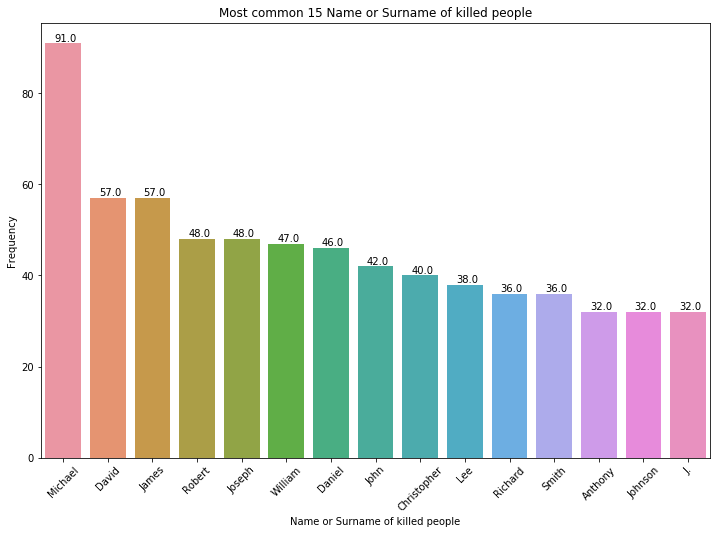

## 3. Killed People According to Races (Pie Chart)

In [20]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [21]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [22]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [23]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [24]:
kill.dropna(inplace=True)

In [25]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [26]:
kill.race.value_counts(normalize=True)

W    0.518190
B    0.262644
H    0.177906
A    0.015972
N    0.012866
O    0.012422
Name: race, dtype: float64

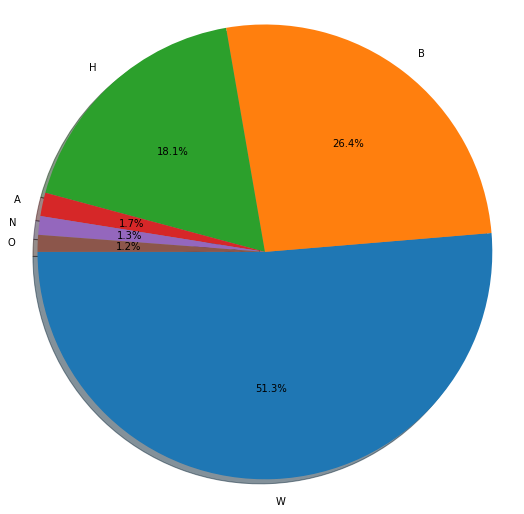

In [41]:
#kill.pie(kill.race.value_counts(normalize=True), labels=labels, autopct='%1.1f%%', shadow=True)

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(kill.race.value_counts(normalize=True),  labels=kill.race.value_counts(normalize=True).index, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 1.0, 'Killed People According to Races')

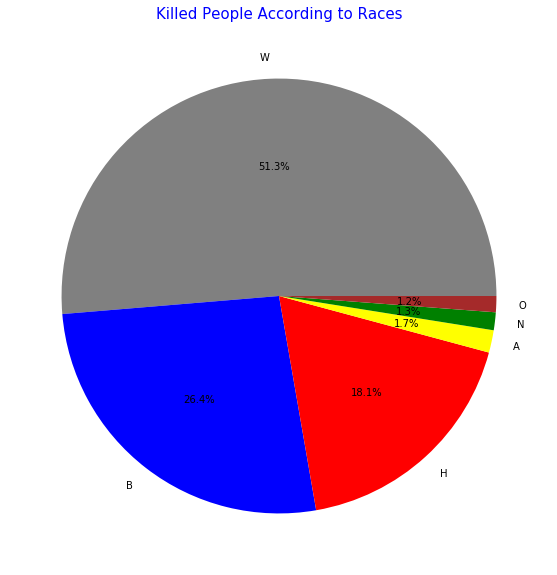

## 4a.Box plot of age in both genders separeted by manner of death.

In [28]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [29]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

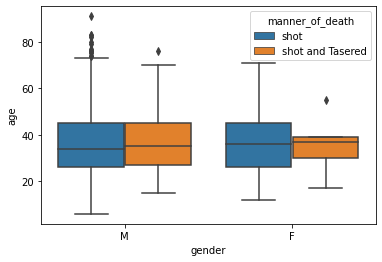

In [30]:
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=kill)

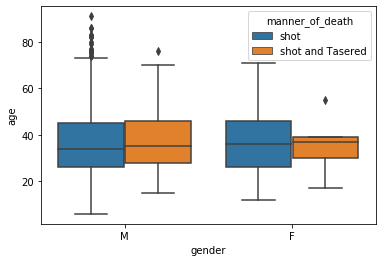

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

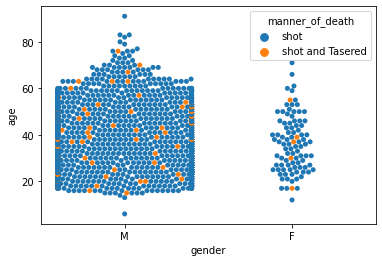

In [31]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill)

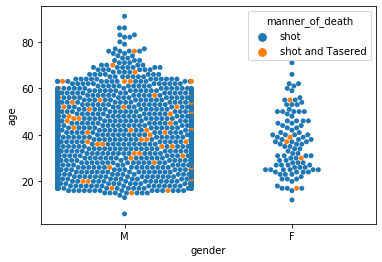

## 5. Kill properties (Count Plots)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

**INSTRUCTION-1: Plot number of poeple by gender**

Text(0.5, 1.0, 'gender')

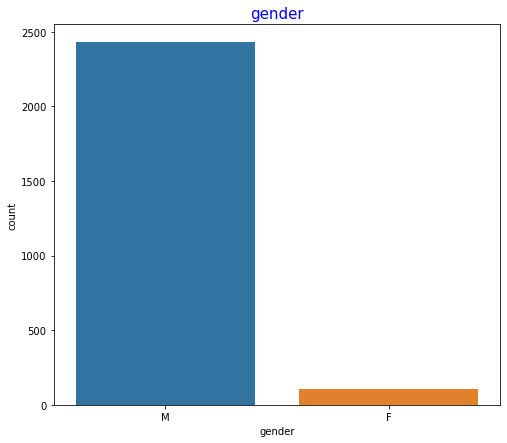

In [26]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.countplot(x="gender",data=kill,hue_order=True)
ax.set_title("gender", {'fontsize': 15,
    'fontweight' : 3,
    'color' : "b",
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'})

Text(0.5, 1.0, 'gender')

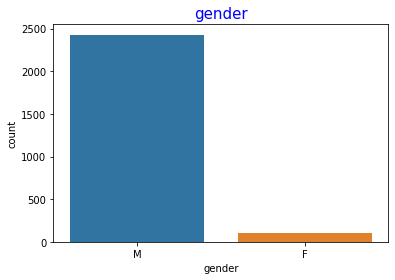

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [30]:
vc=kill.armed.value_counts()[:7]
vc

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

[Text(0, 0, 'gun'),
 Text(0, 0, 'knife'),
 Text(0, 0, 'vehicle'),
 Text(0, 0, 'unarmed'),
 Text(0, 0, 'undetermined'),
 Text(0, 0, 'toy weapon'),
 Text(0, 0, 'machete')]

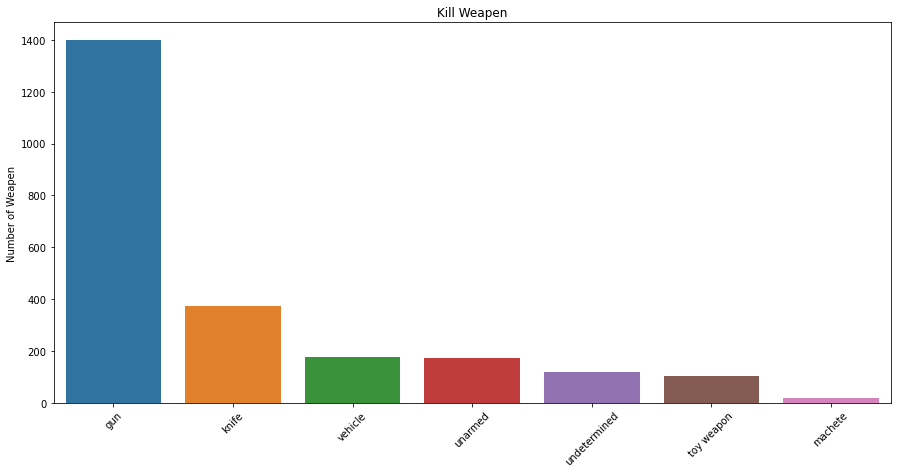

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=vc.index, y= vc.values, ax=ax,data=kill)
ax.set_title("Kill Weapen")
ax.set_ylabel('Number of Weapen')
ax.set_xticklabels(vc.index, rotation=45)

In [34]:
kill.armed.value_counts()[:7]

gun             1247
knife            324
unarmed          165
vehicle          158
toy weapon       102
undetermined      92
machete           16
Name: armed, dtype: int64

Text(0.5, 1.0, 'Kill weapon')

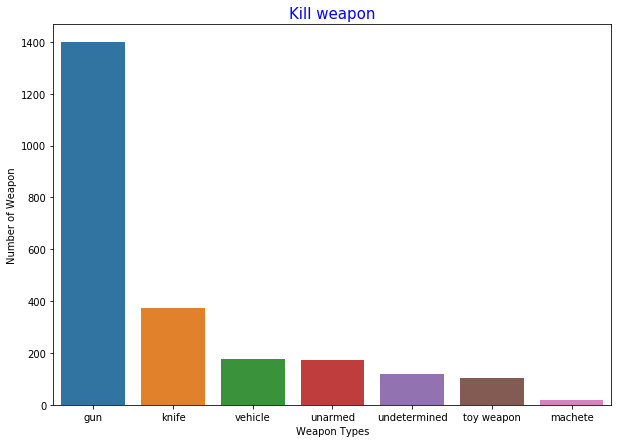

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [54]:
kill["age"]kill.age.

0       53.0
1       47.0
2       23.0
3       32.0
4       39.0
        ... 
2530    31.0
2531     NaN
2532    48.0
2533    28.0
2534    32.0
Name: age, Length: 2535, dtype: float64

Text(0.5, 1.0, 'Age of killed people')

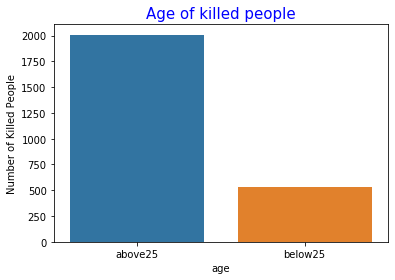

**INSTRUCTION-4: Plot number of killed poeple by race**

Text(0.5, 1.0, 'Race of killed people')

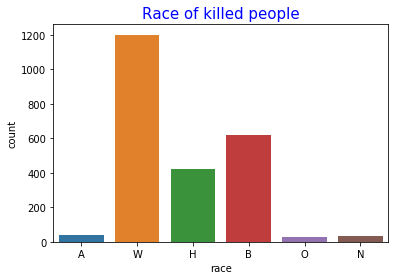

**INSTRUCTION-5: Plot 12 most dangerous cities**

Text(0.5, 1.0, 'Most dangerous cities')

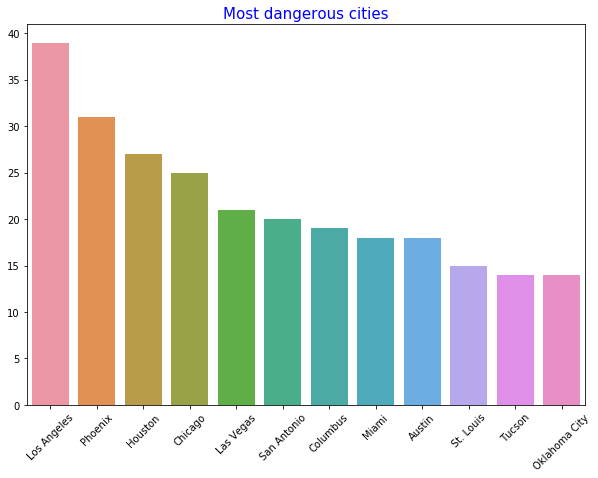

**INSTRUCTION-6: Plot 20 most dangerous states**

Text(0.5, 1.0, 'Most dangerous state')

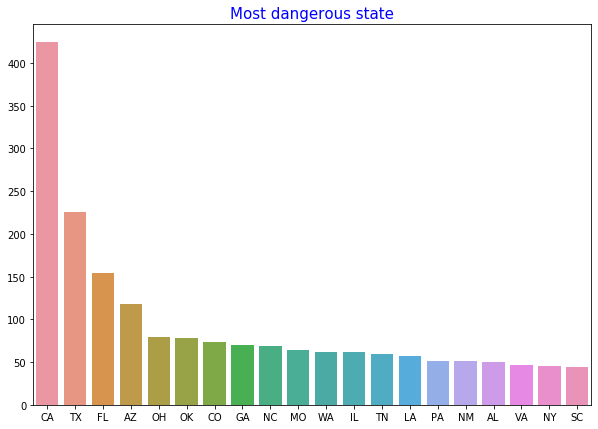

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

Text(0.5, 1.0, 'Having mental illness or not')

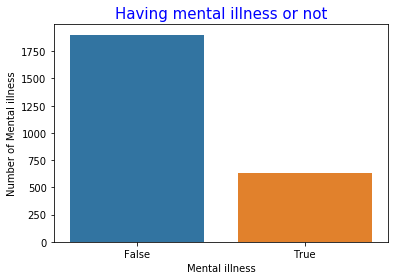

**INSTRUCTION-8: Plot number of Threat Types**

Text(0.5, 1.0, 'Threat types')

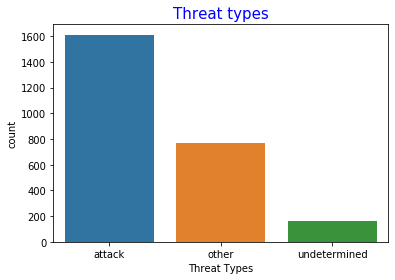

**INSTRUCTION-9: Plot number of Flee Types**

Text(0.5, 1.0, 'Flee types')

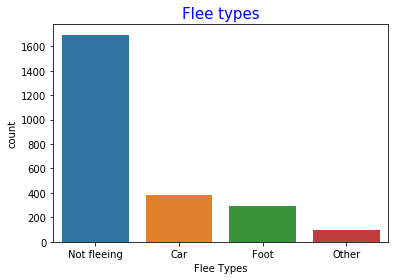